# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [90]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './Data/'

In [97]:
f_app = os.path.join(dir_data, 'application_test.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()
Data={'AMT_INCOME_TOTAL':app_train['AMT_INCOME_TOTAL'],
      'OBS_60_CNT_SOCIAL_CIRCLE':app_train['OBS_60_CNT_SOCIAL_CIRCLE'],
      'REGION_POPULATION_RELATIVE':app_train['REGION_POPULATION_RELATIVE']}
df=pd.DataFrame(Data)
df.head()
print(type(Data))
print(type(df))
print(type(app_train))
app_train=df

Path of read in data: ./Data/application_test.csv
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

3
3
Numbers of remain columns 3
AMT_INCOME_TOTAL


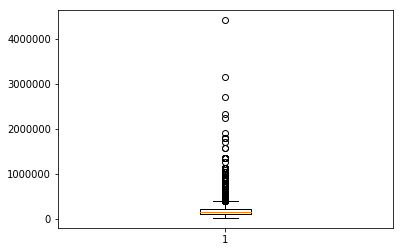

OBS_60_CNT_SOCIAL_CIRCLE


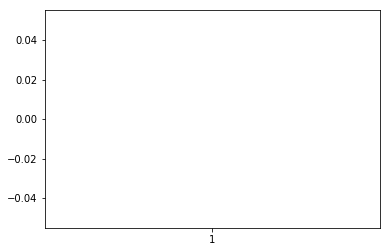

REGION_POPULATION_RELATIVE


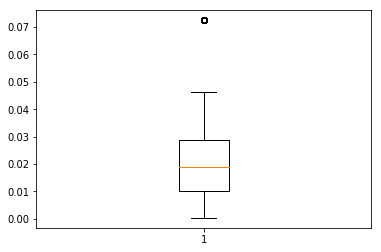

In [98]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [float]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(len(numeric_columns))

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print(len(numeric_columns))
print("Numbers of remain columns %d" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    fig1, ax1 = plt.subplots()
    ax1.boxplot(app_train[col])
    print(col)
    plt.show()

In [99]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


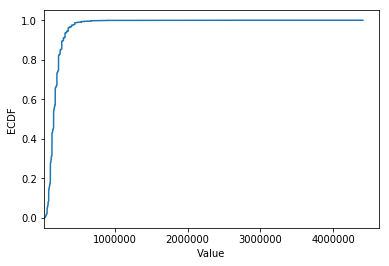

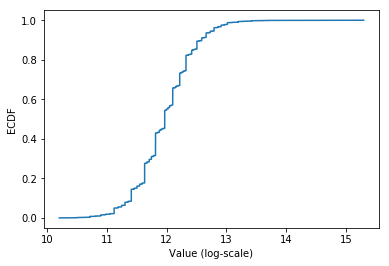

In [100]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
#cdf =np.sort(app_train['AMT_INCOME_TOTAL'])
x=np.sort(app_train['AMT_INCOME_TOTAL'])
y=np.arange(1,len(app_train['AMT_INCOME_TOTAL'])+1)/len(app_train['AMT_INCOME_TOTAL'])

plt.plot(x,y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([x.min(), x.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(x), y)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    48744.000000
mean         0.021226
std          0.014428
min          0.000253
25%          0.010006
50%          0.018850
75%          0.028663
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


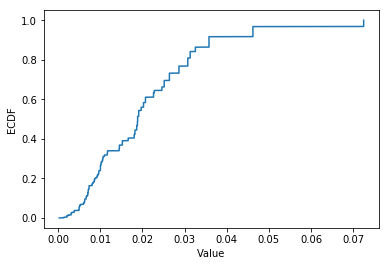

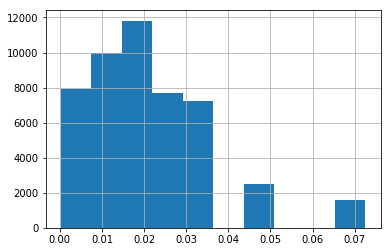

0.035792    2582
0.046220    2497
0.030755    1991
0.026392    1805
0.028663    1740
0.025164    1599
0.031329    1595
0.072508    1565
0.019101    1466
0.020713    1327
0.018850    1288
0.020246    1146
0.018634    1116
0.032561    1088
0.015221    1085
0.018209    1083
0.022625    1060
0.018801     951
0.018029     897
0.024610     860
0.014520     846
0.019689     805
0.010032     676
0.010006     674
0.007020     659
0.016612     652
0.022800     601
0.004960     583
0.014464     552
0.011703     523
            ... 
0.008230     275
0.007114     269
0.006305     269
0.008575     269
0.008019     268
0.005084     267
0.007274     262
0.002042     256
0.003122     252
0.008068     249
0.006671     241
0.003813     235
0.008866     228
0.006852     206
0.006296     205
0.003818     180
0.005313     180
0.006233     178
0.002134     173
0.005144     169
0.005002     156
0.004849     155
0.002506     119
0.003541      92
0.001417      79
0.001276      69
0.001333      28
0.000938      

In [103]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
x=np.sort(app_train['REGION_POPULATION_RELATIVE'])
y=np.arange(1,len(app_train['REGION_POPULATION_RELATIVE'])+1)/len(app_train['REGION_POPULATION_RELATIVE'])

plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    48715.000000
mean         1.435738
std          3.580125
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        351.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


ValueError: Axis limits cannot be NaN or Inf

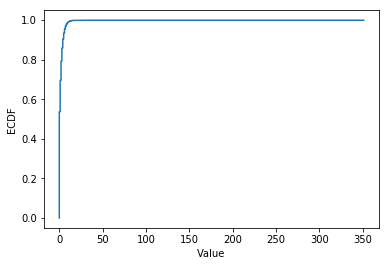

In [105]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
x=np.sort(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])
y=np.arange(1,len(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])+1)/len(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([x.min() * 0.95, x.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

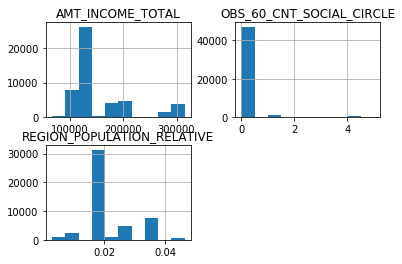

In [126]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
app_train=app_train[app_train.loc[:,'OBS_60_CNT_SOCIAL_CIRCLE']<20]
loc_a = app_train.loc[:,'OBS_60_CNT_SOCIAL_CIRCLE']
#loc_b = 

app_train.loc[loc_a].hist()
plt.show()